In [ ]:
import pandas as pd
import re
from multiprocessing import Pool
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Read the CSV file into a pandas DataFrame

In [ ]:
twitter_data = pd.read_csv("new_csv_data_twitter.csv", encoding='ISO-8859-1')
df = pd.DataFrame(twitter_data)

Assign column names to the DataFrame

In [ ]:
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
twitter_data.columns = column_names

Check the number of rows and columns

In [ ]:
print(twitter_data.shape)

(185164, 6)


Print the first 5 rows of the data

In [ ]:
print(twitter_data.head())

   target          id                          date      flag  \
0       0  2256840565  Sat Jun 20 13:23:13 PDT 2009  NO_QUERY   
1       0  2256840833  Sat Jun 20 13:23:14 PDT 2009  NO_QUERY   
2       0  2256840932  Sat Jun 20 13:23:15 PDT 2009  NO_QUERY   
3       0  2256841034  Sat Jun 20 13:23:15 PDT 2009  NO_QUERY   
4       0  2256841454  Sat Jun 20 13:23:18 PDT 2009  NO_QUERY   

              user                                               text  
0       bethdonald  @SummerTheKid I just wrote a massive reply on ...  
1  LicelleVicencio  Had to leave. It was pouring.  i took pictures...  
2  stevenisHAUNTED  #trackle I could NOT find any AT&amp;T store o...  
3           bradlc               I wish that I could dance like Sree   
4  ethanol_emillee  so my boyfriend is gone to church camp and i c...  


Find all missing values in the dataset

In [ ]:
print(twitter_data.isnull().sum())

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


Convert the target value 4 to 1 (positive sentiment)

* Check the distribution of the target column
* type = 0: negative sentiment
* type = 1: positive sentiment





In [ ]:
print(twitter_data.replace({'target': {4: 1}}, inplace=True))
print(twitter_data['target'].value_counts())

None
target
0    93082
1    92082
Name: count, dtype: int64


Initialize the PorterStemmer

In [ ]:
port_stem = PorterStemmer()

Function to clean and stem the text data

*   Remove non-alphabetic characters
*   Convert to lowercase
*   Split into words
*   Remove stopwords and stem the words
*   Join the words back into a single string





In [ ]:
def stemmed(content):
    # Remove non-alphabetic characters
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    # Convert to lowercase
    stemmed_content = stemmed_content.lower()
    # Split into words
    stemmed_content = stemmed_content.split()
    # Remove stopwords and stem the words
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    # Join the words back into a single string
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

Apply the stemming function to the test column

In [ ]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemmed)

Print the first 5 rows to check the new 'stemmed_content' column


In [ ]:
print(twitter_data.head())

   target          id                          date      flag  \
0       0  2256840565  Sat Jun 20 13:23:13 PDT 2009  NO_QUERY   
1       0  2256840833  Sat Jun 20 13:23:14 PDT 2009  NO_QUERY   
2       0  2256840932  Sat Jun 20 13:23:15 PDT 2009  NO_QUERY   
3       0  2256841034  Sat Jun 20 13:23:15 PDT 2009  NO_QUERY   
4       0  2256841454  Sat Jun 20 13:23:18 PDT 2009  NO_QUERY   

              user                                               text  \
0       bethdonald  @SummerTheKid I just wrote a massive reply on ...   
1  LicelleVicencio  Had to leave. It was pouring.  i took pictures...   
2  stevenisHAUNTED  #trackle I could NOT find any AT&amp;T store o...   
3           bradlc               I wish that I could dance like Sree    
4  ethanol_emillee  so my boyfriend is gone to church camp and i c...   

                                     stemmed_content  
0  summerthekid wrote massiv repli fb lost write ...  
1             leav pour took pictur wash away though  
2  tr

Separate the data and labels

In [ ]:
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values

In [ ]:
print(X)
print(Y)

['summerthekid wrote massiv repli fb lost write haha'
 'leav pour took pictur wash away though'
 'trackl could find amp store best buy iphon avail within mile radiu' ...
 'shortie'
 'final pick handwrap struggl wrap stronger hand defo got lot sooner though'
 'richardbsmith glad like quot integr one product moment']
[0 0 0 ... 1 1 1]


spliting the data to traninig data and test data:



*   x  twitte
* y tarin data

* x_test & y_test is target data and level data
* x_train & y_train is training data
   



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Now we will converrting acutal data into numerical data:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
change_numerical_data = TfidfVectorizer()

x_train = change_numerical_data.fit_transform(x_train)
x_test = change_numerical_data.transform(x_test)

print(x_train)
print(x_test)

  (0, 33324)	0.2701683415401969
  (0, 89594)	0.16533477075769848
  (0, 50993)	0.2793447454683294
  (0, 81295)	0.1922355675889476
  (0, 3162)	0.18074020205973373
  (0, 28620)	0.34142769366167386
  (0, 83041)	0.35076663559429927
  (0, 75734)	0.30021555294919616
  (0, 33229)	0.13721809721003084
  (0, 57314)	0.43535709503579795
  (0, 7971)	0.46250878113015226
  (1, 49484)	0.3163877498774957
  (1, 53453)	0.3123017476727901
  (1, 17507)	0.32287106439484414
  (1, 87398)	0.26530503490340707
  (1, 93604)	0.2556866586969206
  (1, 73801)	0.29497009612048736
  (1, 13291)	0.4463056495581065
  (1, 32639)	0.45362474022688853
  (1, 65648)	0.26530503490340707
  (2, 68895)	0.26140904410341204
  (2, 37962)	0.24578569269594838
  (2, 17170)	0.12936324838271174
  (2, 62623)	0.3616217757386197
  (2, 38256)	0.1217557878311191
  :	:
  (148128, 80731)	0.2679661535414327
  (148128, 89100)	0.24101366847388295
  (148128, 6202)	0.2387374844462746
  (148128, 35045)	0.19023782209910498
  (148128, 4315)	0.240342058344

Now we will tranining the machine learning model:


*   Logistic regression;




In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

Model evlution:

Accuracy score:

Accuray score on the training data:

In [ ]:
x_train_pridiction = model.predict(x_train)
traninig_data_accuracy = accuracy_score(y_train, x_train_pridiction)

In [ ]:
print("this is accuracy score by the training data set :", traninig_data_accuracy)

this is accuracy score by the training data set : 0.8346058556277889


We will make pie to show the accuracy of tranining data sets

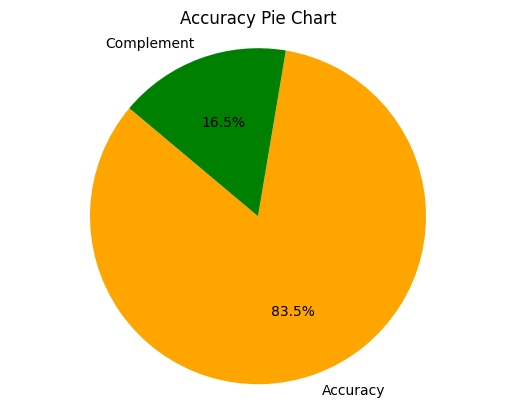

In [ ]:
import matplotlib.pyplot as plt
accuracy = traninig_data_accuracy

# Calculate the complement of accuracy
complement_accuracy = 1 - accuracy

# Labels for the pie chart
labels = ['Accuracy', 'Complement']
sizes = [accuracy, complement_accuracy]

# Colors for the pie chart
colors = ['orange', 'green']

# Plot the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add title
plt.title('Accuracy Pie Chart')

# Show plot
plt.show()

 Accuracy score on the test data:

In [ ]:
x_test_pridiction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_train, x_train_pridiction)

In [ ]:
print("This is accuracy score by the test data set :", test_data_accuracy)

This is accuracy score by the test data set : 0.8346058556277889


We will make pie to show the accuracy of test data sets

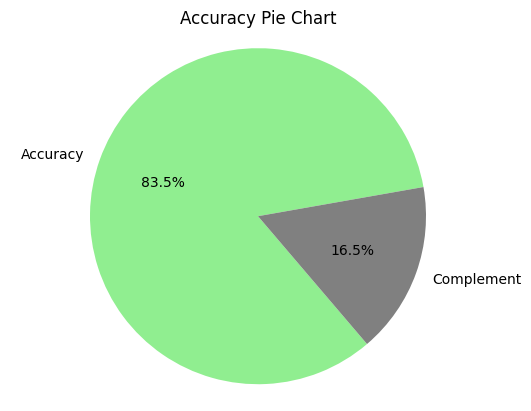

In [ ]:
accuracy = test_data_accuracy

# Calculate the complement of accuracy
complement_accuracy = 1 - accuracy

# Labels for the pie chart
labels = ['Accuracy', 'Complement']
sizes = [accuracy, complement_accuracy]

# Colors for the pie chart
colors = ['lightgreen', 'grey']

# Plot the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=10)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add title
plt.title('Accuracy Pie Chart')

# Show plot
plt.show()

Saveing the training mode for reuse:

In [ ]:
import pickle

filename = 'training_model.pk'
pickle.dump(model,open(filename,'wb'))


Using the save model for feature preduction:

In [ ]:
load_model = pickle.load(open('training_model.pk', 'rb'))

X_new = x_test[200]
print(y_test[200])

0


In [ ]:
prediction = model.predict(X_new)
print(prediction)

[1]


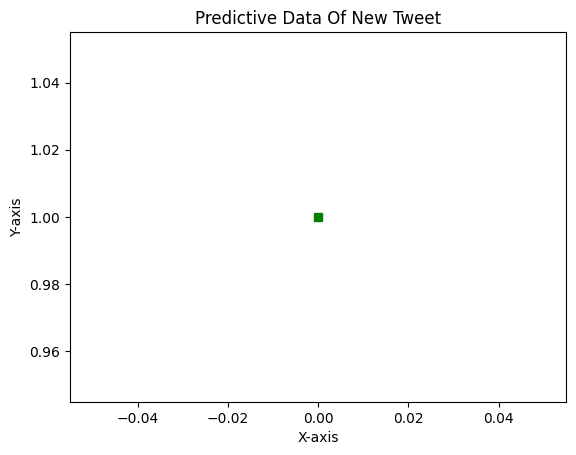

In [ ]:
plt.plot(prediction, marker='s', linestyle='--', color="green")

plt.title('Predictive Data Of New Tweet')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [ ]:
if prediction[0] == 0:
    print('Negative tweet')

else:
    print('Positive tweet')

Positive tweet
